In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import random
import matplotlib.pyplot as plt

from graspologic.inference import (
    LatentPositionTest,
    LatentDistributionTest,
)
from graspologic.embed import AdjacencySpectralEmbed
from graspologic.simulations import sbm, rdpg
from graspologic.utils import symmetrize
from graspologic.plot import heatmap, pairplot


In [2]:
n_components = 2
P = np.array(
    [[0.9, 0.6], [0.6, 0.9]]
)
n_verts = []
p_vals = []

In [3]:
#run sim for latent position test
for n in range(50, 201, 10):
    for _ in range(0, 10):
        csize = [n] * n_components
        A1 = sbm(csize, P)
        A2 = sbm(csize, P)
        lpt_class = LatentPositionTest(n_bootstraps=500, n_components=n_components)
        lpt_class.fit(A1, A2)
        
        p_vals.append(lpt_class.p_value_)
        n_verts.append(n)
        print(lpt_class.p_value_)
p_vals_dict = {"p-values class": p_vals}
df = pd.DataFrame(data = p_vals_dict, index = n_verts)
df.to_csv('p_values_lpt2.csv')

0.5568862275449101
0.8223552894211577
0.7744510978043913
0.8922155688622755
0.7644710578842315
0.590818363273453
0.656686626746507
0.1536926147704591
0.003992015968063872
0.2275449101796407
0.6626746506986028
0.2315369261477046
0.656686626746507
0.03992015968063872
0.5149700598802395
0.05588822355289421
0.3273453093812375
0.7245508982035929
0.2375249500998004
0.043912175648702596
0.13373253493013973
0.12974051896207583
0.7105788423153693
0.812375249500998
0.40119760479041916
0.8303393213572854
0.033932135728542916
0.8003992015968064
0.2714570858283433
0.9880239520958084
0.29740518962075846
0.01996007984031936
0.5548902195608783
0.19161676646706588
0.20958083832335328
0.021956087824351298
0.23952095808383234
0.3313373253493014
0.1996007984031936
0.06986027944111776
0.0658682634730539
0.3273453093812375
0.906187624750499
0.21956087824351297
0.35528942115768464
0.7724550898203593
0.5129740518962076
0.281437125748503
0.25349301397205587
0.2934131736526946
0.5548902195608783
0.3832335329341

In [4]:
#fixed sbm for A1
A1 = sbm([100]*n_components, P)
n_verts = []
p_vals = []

In [5]:
#run sim for LDT
for n in range(100, 301, 10):
    for _ in range(0, 10):
        csize = [n] * n_components
        A2 = sbm(csize, P)
        ldt_class = LatentDistributionTest(n_bootstraps=500, n_components=n_components, size_correction=True)
        ldt_class.fit(A1, A2)
        
        p_vals.append(ldt_class.p_value_)
        n_verts.append(n)
        print(ldt_class.p_value_)
p_vals_dict = {"p-values class": p_vals}
df = pd.DataFrame(data = p_vals_dict, index = n_verts)
df.to_csv('p_values_ldt.csv')

1.0
0.99
0.882
0.992
0.964
0.992
1.0
0.79
1.0
0.858
0.934
0.96
0.986
0.996
0.972
0.978
0.994
0.952
0.986
0.926
0.964
0.982
0.974
0.998
0.826
0.954
0.982
0.966
0.914
0.982
0.946
0.942
1.0
0.956
0.972
0.916
0.966
0.938
0.874
0.972
0.986
0.926
0.958
0.992
0.998
0.994
0.984
0.992
0.976
0.99
0.962
0.982
0.928
0.938
0.854
0.94
0.806
0.83
0.984
0.898
0.976
0.922
0.95
0.98
0.99
0.984
0.972
0.982
0.982
0.952
0.948
0.936
0.986
0.98
0.872
1.0
0.972
0.988
0.958
0.928
0.892
0.918
0.976
0.918
0.944
0.998
0.996
0.996
0.936
0.958
0.982
0.978
0.96
0.876
0.986
1.0
0.906
0.894
0.974
0.984
0.992
0.988
0.938
0.986
0.97
0.964
0.86
0.894
0.762
0.944
0.958
1.0
0.988
0.93
0.964
0.96
0.996
0.854
0.976
0.958
0.968
0.994
0.996
0.968
0.992
0.996
0.912
1.0
0.998
0.966
0.98
0.944
0.972
0.958
0.898
0.946
0.884
1.0
0.916
0.952
0.95
0.98
0.922
0.874
0.952
0.94
0.998
0.984
0.97
0.902
0.998
0.936
1.0
1.0
0.904
0.992
0.908
0.776
0.972
0.958
0.996
0.896
0.976
0.998
0.982
0.904
0.99
0.998
0.89
0.99
0.986
0.966
0.986
0.984
0

          0-0.09  0.1-0.19  0.2-0.29  0.3-0.39  0.4-0.49  0.5-0.59  0.6-0.69  \
0.556886      25        20        27        23        16        12         9   
0.822355      25        20        27        23        16        12         9   
0.774451      25        20        27        23        16        12         9   
0.892216      25        20        27        23        16        12         9   
0.764471      25        20        27        23        16        12         9   
...          ...       ...       ...       ...       ...       ...       ...   
0.648703      25        20        27        23        16        12         9   
0.461078      25        20        27        23        16        12         9   
0.315369      25        20        27        23        16        12         9   
0.079840      25        20        27        23        16        12         9   
0.023952      25        20        27        23        16        12         9   

          0.7-0.79  0.8-0.89  0.9-0.99 

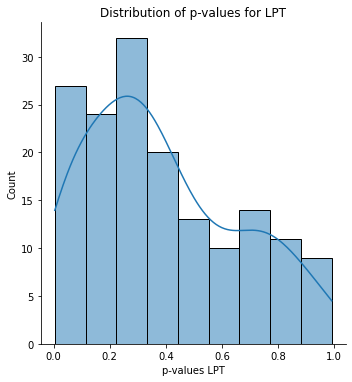

In [6]:
#displot for LPT
with open('p_values_lpt2.csv', 'r') as csvFile:
    csvReader = csv.reader(csvFile)
    headers = next(csvReader)
    p_vals_lpt = []
    for row in csvReader:
        p_vals_lpt.append((float)(row[1]))
    
    lpt_dict = {'0-0.09': 0, 
                '0.1-0.19': 0, 
                '0.2-0.29': 0, 
                '0.3-0.39': 0, 
                '0.4-0.49': 0,
                '0.5-0.59': 0, 
                '0.6-0.69': 0, 
                '0.7-0.79': 0,
                '0.8-0.89': 0, 
                '0.9-0.99': 0}
    p_list = ['0-0.09', '0.1-0.19', '0.2-0.29', '0.3-0.39', '0.4-0.49', '0.5-0.59', '0.6-0.69', '0.7-0.79',
              '0.8-0.89', '0.9-0.99']
    
    for p in p_vals_lpt:
        index = 0
        if(0<=p<0.1):
            index = 0
        if(0.1<=p<0.2):
            index = 1
        if(0.2<=p<0.3):
            index = 2
        if(0.3<=p<0.4):
            index = 3
        if(0.4<=p<0.5):
            index = 4
        if(0.5<=p<0.6):
            index = 5
        if(0.6<=p<0.7):
            index = 6
        if(0.7<=p<0.8):
            index = 7
        if(0.8<=p<0.9):
            index = 8
        if(0.9<=p<1):
            index = 9
        lpt_dict[p_list[index]] += 1
    df = pd.DataFrame(data=lpt_dict, index = p_vals_lpt)
    print(df)
    lpt_plot = sns.displot(data=df,x=p_vals_lpt, kde=True)
    plt.xlabel('p-values LPT')
    plt.title('Distribution of p-values for LPT')
    plt.savefig('lpt_displot.png', bbox_inches = 'tight')

       0-0.09  0.1-0.19  0.2-0.29  0.3-0.39  0.4-0.49  0.5-0.59  0.6-0.69  \
1.000      14         0         0         0         0         0         0   
0.990      14         0         0         0         0         0         0   
0.882      14         0         0         0         0         0         0   
0.992      14         0         0         0         0         0         0   
0.964      14         0         0         0         0         0         0   
...       ...       ...       ...       ...       ...       ...       ...   
0.968      14         0         0         0         0         0         0   
0.974      14         0         0         0         0         0         0   
0.976      14         0         0         0         0         0         0   
0.942      14         0         0         0         0         0         0   
0.992      14         0         0         0         0         0         0   

       0.7-0.79  0.8-0.89  0.9-0.99  
1.000         3        22       171  

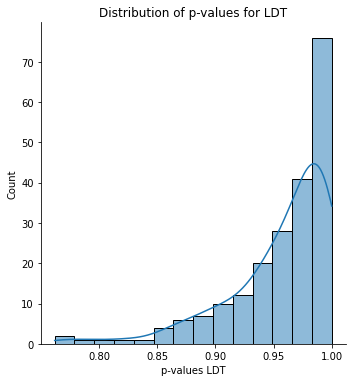

In [7]:
#displot for LDT
with open('p_values_ldt.csv', 'r') as csvFile:
    csvReader = csv.reader(csvFile)
    headers = next(csvReader)
    p_vals_ldt = []
    for row in csvReader:
        p_vals_ldt.append((float)(row[1]))
    
    ldt_dict = {'0-0.09': 0, 
                '0.1-0.19': 0, 
                '0.2-0.29': 0, 
                '0.3-0.39': 0, 
                '0.4-0.49': 0,
                '0.5-0.59': 0, 
                '0.6-0.69': 0, 
                '0.7-0.79': 0,
                '0.8-0.89': 0, 
                '0.9-0.99': 0}
    p_list = ['0-0.09', '0.1-0.19', '0.2-0.29', '0.3-0.39', '0.4-0.49', '0.5-0.59', '0.6-0.69', '0.7-0.79',
              '0.8-0.89', '0.9-0.99']
    
    for p in p_vals_ldt:
        index = 0
        if(0<=p<0.1):
            index = 0
        if(0.1<=p<0.2):
            index = 1
        if(0.2<=p<0.3):
            index = 2
        if(0.3<=p<0.4):
            index = 3
        if(0.4<=p<0.5):
            index = 4
        if(0.5<=p<0.6):
            index = 5
        if(0.6<=p<0.7):
            index = 6
        if(0.7<=p<0.8):
            index = 7
        if(0.8<=p<0.9):
            index = 8
        if(0.9<=p<1):
            index = 9
        ldt_dict[p_list[index]] += 1
    df = pd.DataFrame(data=ldt_dict, index = p_vals_ldt)
    print(df)
    ldt_plot = sns.displot(data=df,x=p_vals_ldt, kde=True)
    plt.xlabel('p-values LDT')
    plt.title('Distribution of p-values for LDT')
    plt.savefig('ldt_displot.png', bbox_inches = 'tight')